In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from simulation import run_simulation
from histograms import compute_distances
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: ylabel='Count'>

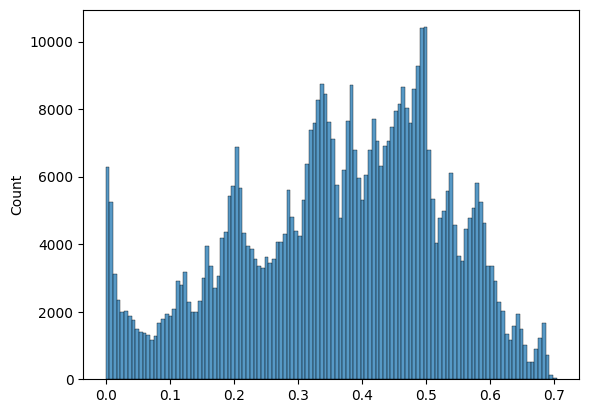

In [40]:
n = 1000 # Starting plankton population size.
iters = 500 # Time steps.
L_max = 1 # Size of square domain.
area = L_max * L_max
colour_map = "hsv"

plankton, initial_plankton = run_simulation(n, iters, L_max, True)

starting_x = [p.x_0 for p in initial_plankton]
starting_y = [p.y_0 for p in initial_plankton]
starting_positions_0 = [p.y_0 for p in initial_plankton]

x_positions = [p.x for p in plankton]
y_positions = [p.y for p in plankton]
starting_positions = [p.y_0 for p in plankton]

dists = compute_distances(plankton, L_max)

sns.histplot(dists[dists > 0].flatten())

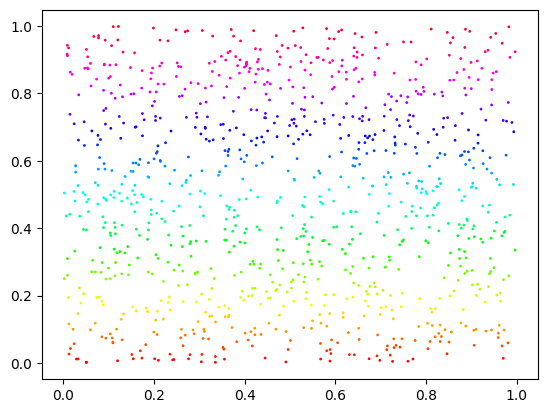

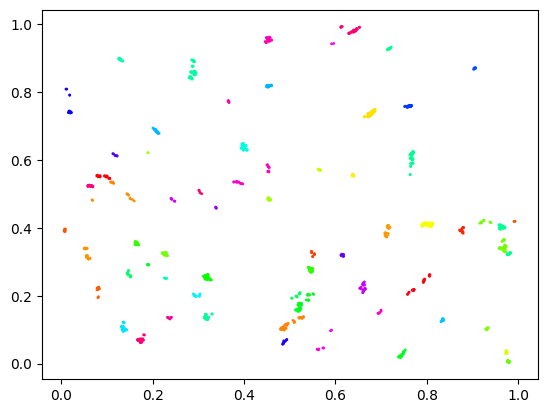

In [36]:
plt.scatter(x=starting_x, y=starting_y, c=starting_positions_0, s=1, cmap=colour_map)
plt.show()
plt.scatter(x=x_positions, y=y_positions, c=starting_positions, s=1, cmap=colour_map)
plt.show()